# SARIMA (Seasonal AutoRegressive Integrated Moving Average)
- How to call the Classical Time Series Models for forecast

<div style="background-color: #e5d5ff ; line-height: 2em">

### 1. SARIMA Forecast (1, 1, 1, 52) - Rolling

</div>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


c:\Users\myeng\Downloads\aiap\mini_project\src\datapipeline.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)
c:\Users\myeng\Downloads\aiap\mini_project\src\datapipeline.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)
c:\Users\myeng\anaconda3\envs\mini_project\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except 

Evaluate metric: 95951.5820932359


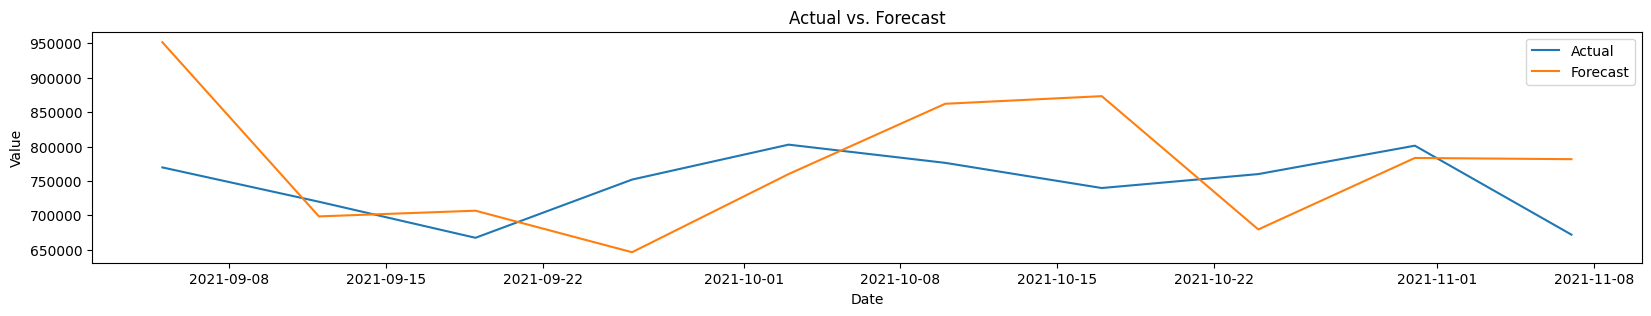

In [2]:
%load_ext autoreload
%autoreload 2

from src.sarima_model import sarima_forecast

# SARIMA seasonal_order = (1, 1, 1, 52) - Rolling
model_r111 = sarima_forecast(order = (1, 1, 1), seasonal_order = (1, 1, 1, 52), rolling=True)
#model_r111 = sarima_forecast(order = (1, 1, 1), seasonal_order = (1, 1, 1, 52), rolling=True, model_name="models/sarima_rolling_forecast.pkl")


In [4]:
import pickle

# # # try saving the model:
# # Save the trained model to a pickle file
# with open('sarima_model.pkl', 'wb') as file:
#     pickle.dump(model_r111, file)


In [17]:
from src.sarima_model import *
data = load_data_full()
data = pd.DataFrame(data)

c:\Users\myeng\Downloads\aiap\mini_project\src\datapipeline.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)
c:\Users\myeng\Downloads\aiap\mini_project\src\datapipeline.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)


In [27]:
import pickle
# Load the saved model from the pickle file
with open('models/sarima_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded model for prediction or further analysis
loaded_model.predict (n_periods=10)

TypeError: Model.predict() missing 1 required positional argument: 'params'

In [29]:
data

,num_orders
date,
2019-02-03,792261
2019-02-10,787084
2019-02-17,695262
2019-02-24,743529
2019-03-03,1198675
...,...
2021-10-10,776240
2021-10-17,739661
2021-10-24,759926


In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pickle
from src.sarima_model import *
data = load_data_full()
data = pd.DataFrame(data)

# Generate or load your time series data
# For this example, let's assume you have a pandas DataFrame called 'data' with a single column 'num_orders' representing your time series data.

# Split the data into train and test sets
train_data = data.iloc[:-12]  # Use all but the last 12 data points for training
test_data = data.iloc[-12:]  # Use the last 12 data points for testing

# Train the SARIMA model
order = (1, 0, 1)  # (p, d, q)
seasonal_order = (1, 0, 1, 12)  # (P, D, Q, S)
model = sm.tsa.SARIMAX(train_data['num_orders'], order=order, seasonal_order=seasonal_order)
trained_model = model.fit()

# Save the trained model to a pickle file
with open('sarima_model_example.pkl', 'wb') as file:
    pickle.dump(trained_model, file)

# Load the saved model from the pickle file
with open('sarima_model_example.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded model for prediction or further analysis
forecast = loaded_model.forecast(steps=12)  # Generate forecasts for the next 12 time steps


c:\Users\myeng\Downloads\aiap\mini_project\src\datapipeline.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)
c:\Users\myeng\Downloads\aiap\mini_project\src\datapipeline.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)
c:\Users\myeng\anaconda3\envs\mini_project\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('No

In [34]:
forecast.index

DatetimeIndex(['2021-08-22', '2021-08-29', '2021-09-05', '2021-09-12',
               '2021-09-19', '2021-09-26', '2021-10-03', '2021-10-10',
               '2021-10-17', '2021-10-24', '2021-10-31', '2021-11-07'],
              dtype='datetime64[ns]', freq='W-SUN')

<div style="background-color: #e5d5ff ; line-height: 2em">

### 2. SARIMA Focast (1, 1, 1, 52)

</div>

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


d:\GitLab\all-assignments\time_series\src\datapipeline.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)
d:\GitLab\all-assignments\time_series\src\datapipeline.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)
c:\Users\ceris\anaconda3\envs\aiap\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will

Evaluate metric: 126475.14672581162


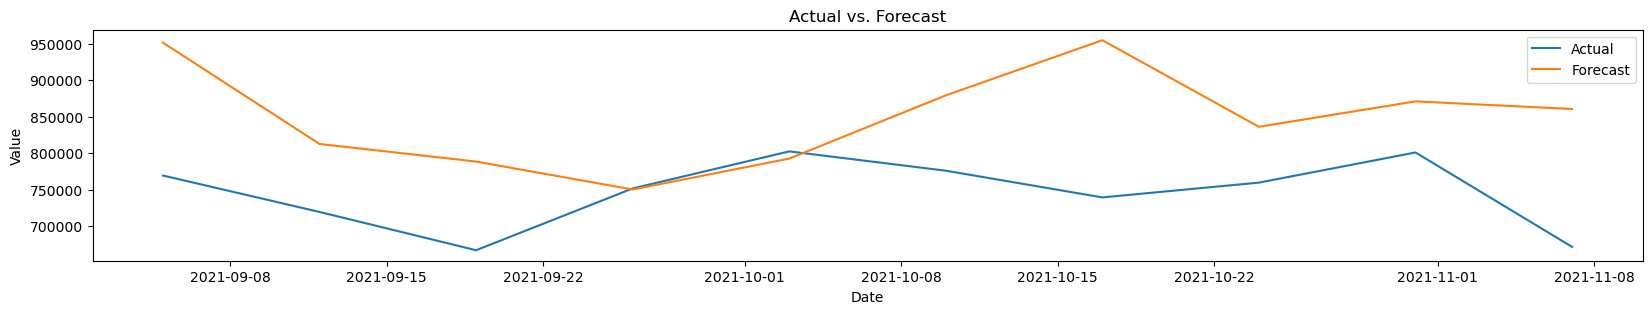

In [7]:
%load_ext autoreload
%autoreload 2

from src.sarima_model import sarima_forecast

# SARIMA seasonal_order = (1, 1, 1, 52) 
model_111 = sarima_forecast(order = (1, 1, 1), seasonal_order = (1, 1, 1, 52), rolling=False)
#model_111 = sarima_forecast(order = (1, 1, 1), seasonal_order = (1, 1, 1, 52), rolling=False, model_name="models/sarima_forecast.pkl")


<div style="background-color: #e5d5ff ; line-height: 2em">

### 3. SARIMA Focast (2, 1, 4, 52)

</div>

d:\GitLab\all-assignments\time_series\src\datapipeline.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)
d:\GitLab\all-assignments\time_series\src\datapipeline.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)
c:\Users\ceris\anaconda3\envs\aiap\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will

Evaluate metric: 121481.54369836724


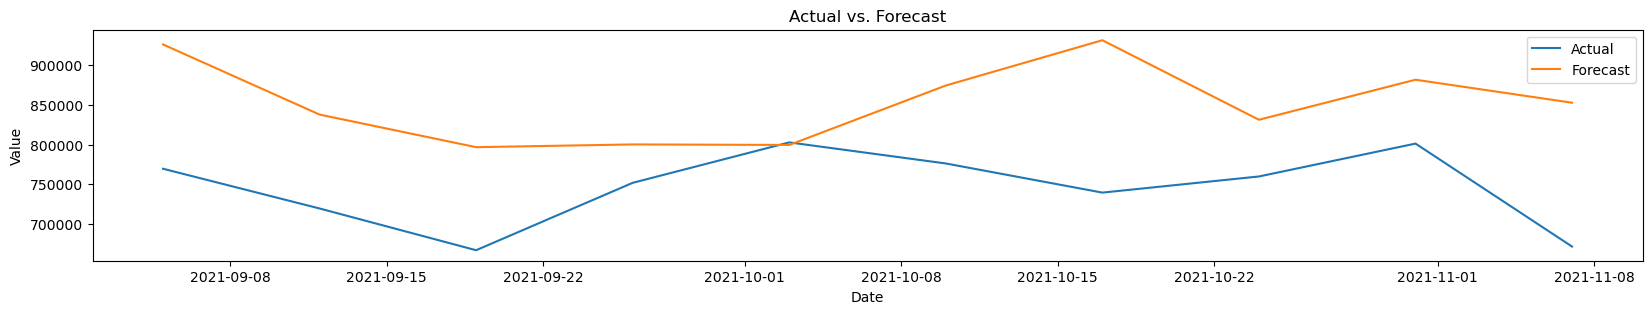

In [8]:
# SARIMA seasonal_order = (2, 1, 4, 52) 
#model_214 = sarima_forecast(order = (2, 1, 4), seasonal_order = (2, 1, 4, 52), rolling=False)
model_214 = sarima_forecast(order = (2, 1, 4), seasonal_order = (2, 1, 4, 52), rolling=False, model_name="models/sarima_forecast_214.pkl")

<div style="background-color: #e5d5ff ; line-height: 2em">

### Compare Evaluation Metric

</div>

In [5]:
import pandas as pd

pd.DataFrame({
    f"Rolling Forecast (p=1, d=1, q=1)": model_r111.eval_metric,
    f"Forecast (p=1, d=1, q=1)": model_111.eval_metric,
    f"Forecast (p=2, d=1, q=4)": model_214.eval_metric
}, index=[0]).astype(int).applymap('{:,}'.format).T


,0
"Rolling Forecast (p=1, d=1, q=1)","95,951"
"Forecast (p=1, d=1, q=1)","126,475"
"Forecast (p=2, d=1, q=4)","121,481"


<div style="background-color: #e5d5ff ; line-height: 2em">

### 4. Grid Searching SARIMA Model Hyperparameters

</div>

<div style="background-color: #e5d5ff ; line-height: 2em">

# Ignore this section - Research

</div>

Todo: [How to Grid Search SARIMA Hyperparameters for Time Series Forecasting](https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/)

Autoregressive Integrated Moving Average, or ARIMA, is one of the most widely used forecasting methods for univariate time series data forecasting. Although the method can handle data with a trend, it does not support time series with a seasonal component. That is a time series with a repeating cycle.

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with trend and seasonal componenst.

Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.

Trend Elements: There are three trend elements that require configuration.
- p: Trend autoregression order.
- d: Trend difference order.
- q: Trend moving average order.

Seasonal Elements: There are four seasonal elements that are not part of ARIMA that must be configured; they are:
- P: Seasonal autoregressive order.
- D: Seasonal difference order.
- Q: Seasonal moving average order.
- m: The number of time steps for a single seasonal period.

Together, the notation for an SARIMA model is specified as: SARIMA(p,d,q)(P,D,Q)m





The trend elements can be chosen through careful analysis of ACF and PACF plots looking at the correlations of recent time steps (e.g. 1, 2, 3).

Similarly, ACF and PACF plots can be analyzed to specify values for the seasonal model by looking at correlation at seasonal lag time steps. https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/


source: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ 

An ARIMA model is a class of statistical models for analyzing and forecasting time series data. It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts. This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:
- AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
- MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. The parameters of the ARIMA model are defined as follows:
- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.

This dataset describes the weekly number of order of food demand over a 3 year period, for a meal delivery company which operates in multiple cities. We can see that the Shampoo Sales dataset has a clear up trend till June 2020. This suggests that the time series is not stationary. We  and will require differencing to make it stationary. We use Augmented Dickey-Fuller test to determine the difference order of 1. 



d:\GitLab\all-assignments\time_series\src\datapipeline.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)
d:\GitLab\all-assignments\time_series\src\datapipeline.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['id', 'week', 'checkout_price', 'cuisine','category'], axis = 1, inplace =True)


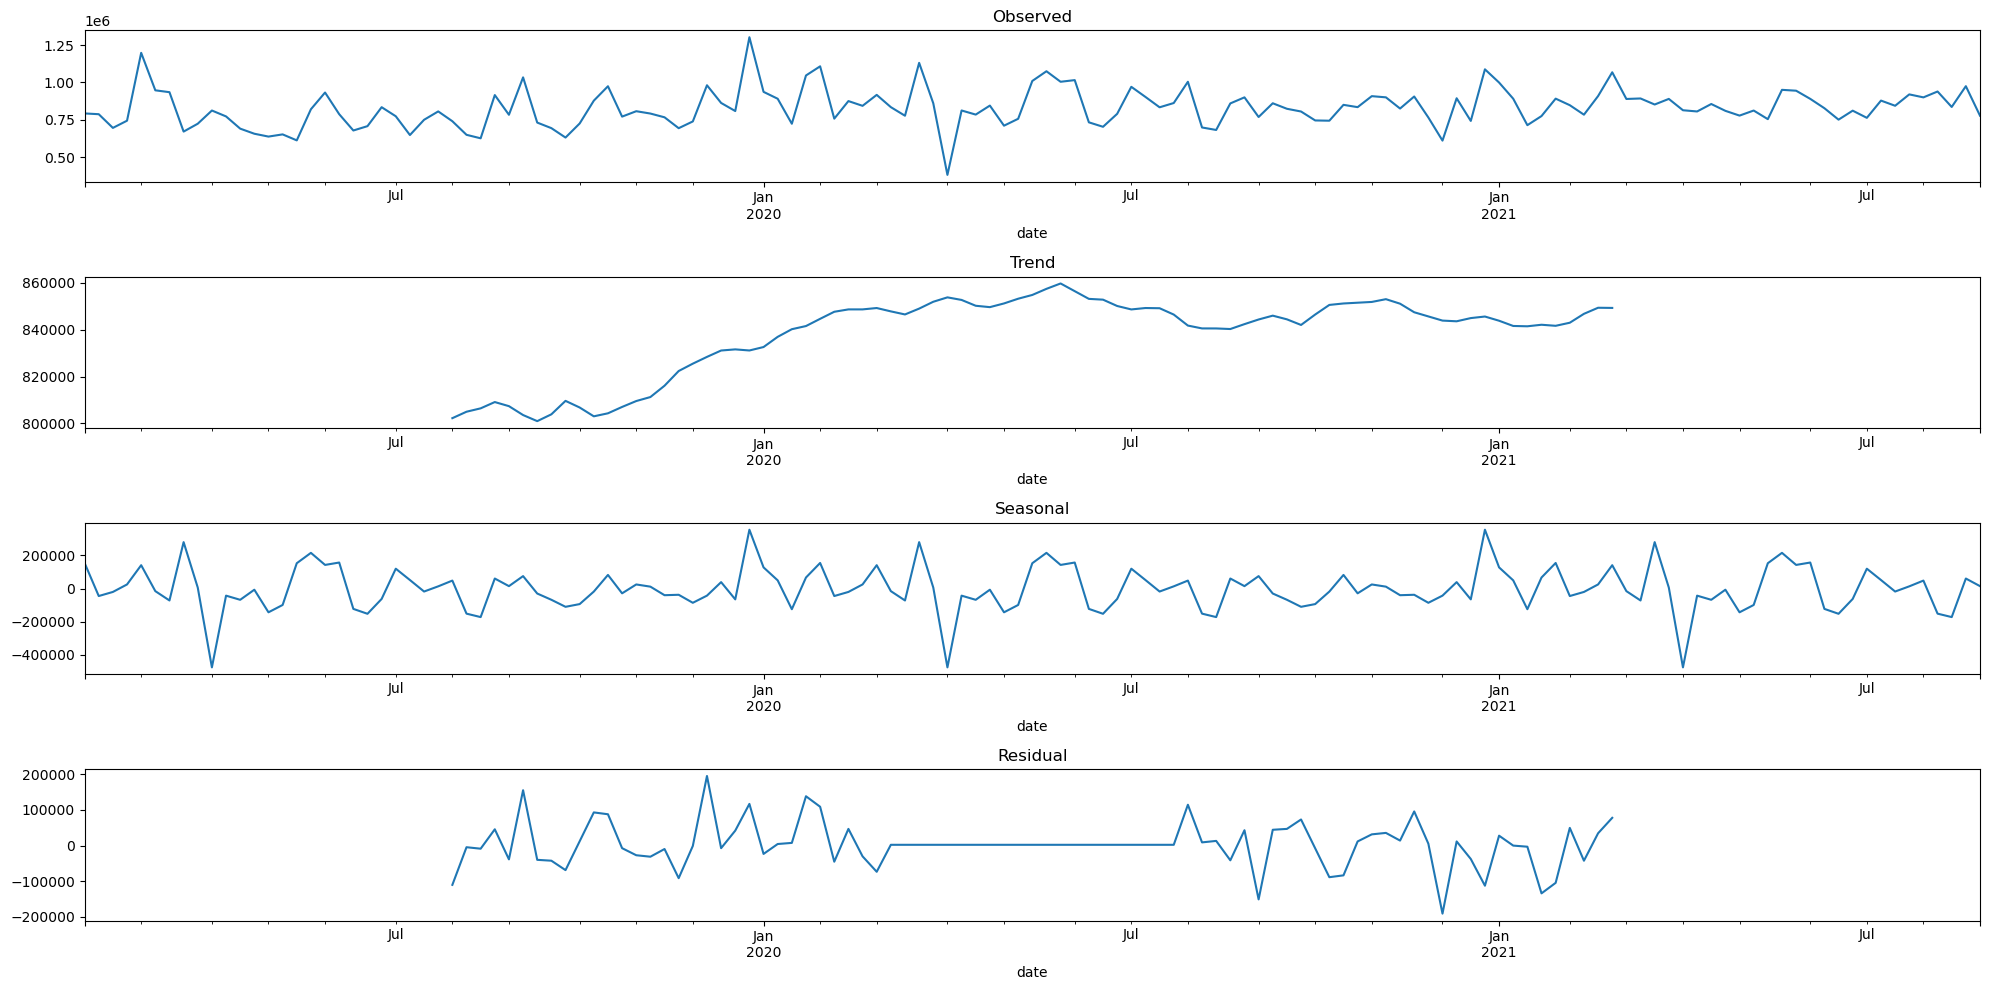

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data using the pipeline function
ts, test = load_data()

# Perform the seasonal decomposition
result = seasonal_decompose(ts)

# Plot the decomposed time series
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 10))
result.observed.plot(ax=ax1, title='Observed')
result.trend.plot(ax=ax2, title='Trend')
result.seasonal.plot(ax=ax3, title='Seasonal')
result.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()

In [7]:
# Checking stationarity: Augmented Dickey-Fuller test
# ADF Test: If p-value < 5% reject null hypothesis (non-stationary)
from statsmodels.tsa.stattools import adfuller

print("Checking stationarity: Augmented Dickey-Fuller test: ts")
adfuller_result = adfuller(ts, autolag='AIC')
print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:\t', f'   {key}, {value}')

Checking stationarity: Augmented Dickey-Fuller test: ts
ADF Statistic: -2.4974620661582505
p-value: 0.1160930532990263
Critial Values:	    1%, -3.4837793736959997
Critial Values:	    5%, -2.88495387648
Critial Values:	    10%, -2.579256976


<div style="background-color: #e5d5ff ; line-height: 2em">

### Checking stationarity - Constant mean. Constant variance. Autocovariance that does not depend on time
- In ADF, 
  - the **null hypothesis** is that a unit root is present in the time series, which means that the `time series is non-stationary`.
  - the alternative hypothesis is that the time series is stationary
  - The `ADF statistic` is -2, and value is negative, which means that the sample mean is below the null hypothesis, suggesting that the time series may be `non-stationary`.
  - The `p-value` is 0.189, assuming that the `null hypothesis is true`. In other words, it is the probability of obtaining the observed result by chance. In this case, the p-value is greater than the significance level of 0.05, which means that we cannot reject the null hypothesis at the 5% significance level.
  - The ADF statistic of -2 `falls between the 5% and 10% critical values`, but is `greater than the 1% critical value`. This means that we cannot reject the null hypothesis at the 5% significance level, but we can reject it at the 1% significance level. Therefore, we have `weak evidence to suggest that the time series may be stationary`.

Based on the result below, we conclude that the time series is **non-stationary** based on the results above. The ADF Statistic is greater than the critical values at all significance levels, and the p-value is greater than the significance level of 0.05. Therefore, we `fail to reject` the null hypothesis and conclude that the time series is non-stationary.

</div>

In [8]:
# The time series data is non-stationary - take the first difference of the time series
print("\nCheck if the differenced time series is stationary: ts_diff")
ts_diff = ts.diff().dropna()

# Check if the differenced time series is stationary
result_diff = adfuller(ts_diff, autolag='AIC')
print('ADF Statistic (differenced): %f' % result_diff[0])
print('p-value (differenced): %f' % result_diff[1])
print('Critical Values (differenced):')

for key, value in result_diff[4].items():
    print('Critial Values:\t', f'   {key}, {value}')


Check if the differenced time series is stationary: ts_diff
ADF Statistic (differenced): -6.494228
p-value (differenced): 0.000000
Critical Values (differenced):
Critial Values:	    1%, -3.4837793736959997
Critial Values:	    5%, -2.88495387648
Critial Values:	    10%, -2.579256976


<div style="background-color: #e5d5ff ; line-height: 2em">

### Transform the original time series 'ts' to the stationary differenced time series 'ts_diff'

The **ADF statistic** is `-6`, which is `less than the critical value at the 1%, 5%, and 10% levels`. This means that we can `reject the null hypothesis` that the differenced time series is non-stationary, and conclude that **the differenced time series is stationary**.

The p-value is very small (close to 0), which further supports the conclusion that the differenced time series is stationary. The critical values at the 1%, 5%, and 10% levels are all less than the ADF statistic, providing additional evidence that the differenced time series is stationary.

In summary, the result of the ADF test after differencing suggests that the time series has become stationary, which is a desirable property for many time series analysis techniques. The **d** value can be determined by looking at the level of differencing required to make the time series stationary. Here, the value of d is 1.

### Use the ACF and PACF plots can be used to identify the p and q values for the ARIMA model
- For the ACF plot, the first significant lag that crosses the confidence interval suggests the value of **q**. Here, the value of q is 1.
- For the PACF plot, the first significant lag that crosses the upper confidence interval suggests the value of **p**. Here, the value of p is 1.

</div>

ACF values: [ 1.00000000e+00 -3.10267454e-01 -1.78972371e-01 -8.02587693e-02
  7.67152687e-02  7.81868176e-02 -2.04003940e-01  3.72505892e-02
  2.78384764e-01 -2.53869638e-01  1.45435040e-02  5.44591067e-02
  4.92264286e-02  2.14196098e-04 -2.28368206e-01  1.93930486e-01
  8.94511261e-02 -1.79094906e-01  6.16800154e-02  1.43761075e-02
 -5.82903176e-02]

PACF values: [ 1.00000000e+00 -3.12600292e-01 -3.09662953e-01 -3.10482299e-01
 -1.88354005e-01 -6.94586756e-02 -3.14810999e-01 -2.65582270e-01
  1.22974027e-01 -2.60136700e-01 -1.52399804e-01 -8.81914592e-03
 -8.30809594e-02 -1.73344663e-02 -2.00377971e-01 -7.23988415e-02
  3.46728304e-04 -1.42727517e-01 -4.40310514e-02 -1.52055762e-02
 -3.04897115e-01]


c:\Users\ceris\anaconda3\envs\aiap\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


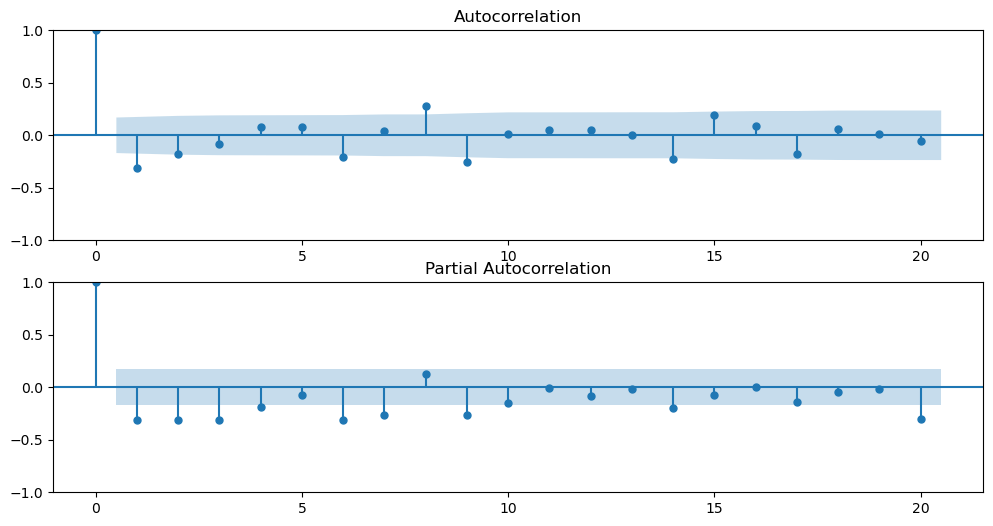

In [9]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

lags = 20

# Compute the ACF - the autocorrelation between an observation and another observation at a prior time step that includes 'direct' and 'indirect' dependence information
acf_values = acf(ts_diff, nlags=lags)
print("ACF values:", acf_values)

# Compute the PACF - the 'direct' relationship between an observation and its lag
pacf_values = pacf(ts_diff, nlags=lags)
print("\nPACF values:",pacf_values)

# Visualize the ACF and PACF of the time series
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff.dropna(),lags=lags,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_diff.dropna(),lags=lags,ax=ax2)
plt.show()

<div style="background-color: #e5d5ff ; line-height: 2em">

## Create Models - ARIMA, ARIMA (manual differenced time series), AUTO_ARIMA

</div>

In [11]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Use manually selected parameters to fit ARIMA model - use AR(1) model with a MA component of order 1.
model_111 = ARIMA(ts, order=(1, 1, 1)).fit()
print('\nManual ARIMA summary: order=(1, 1, 1)')
print(model_111.summary())

# Use auto_arima to identify optimal parameters for ARIMA model
model_auto = auto_arima(ts)
print('Auto-ARIMA summary:')
print(model_auto.summary())

# Use manually selected parameters to fit ARIMA model - use AR(1) model with a MA component of order 1.
model_214 = ARIMA(ts, order=(2, 1, 4)).fit()
print('\nManual ARIMA summary: order=(2, 1, 4)')
print(model_214.summary())


c:\Users\ceris\anaconda3\envs\aiap\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Manual ARIMA summary: order=(1, 1, 1)
                               SARIMAX Results                                
Dep. Variable:             num_orders   No. Observations:                  135
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1769.493
Date:                Fri, 14 Apr 2023   AIC                           3544.987
Time:                        16:48:08   BIC                           3553.680
Sample:                    02-03-2019   HQIC                          3548.519
                         - 08-29-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2891      0.098      2.943      0.003       0.097       0.482
ma.L1         -0.9519      0.026    -36.819      0.000      -1.003      -0.901
sigma2       

c:\Users\ceris\anaconda3\envs\aiap\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


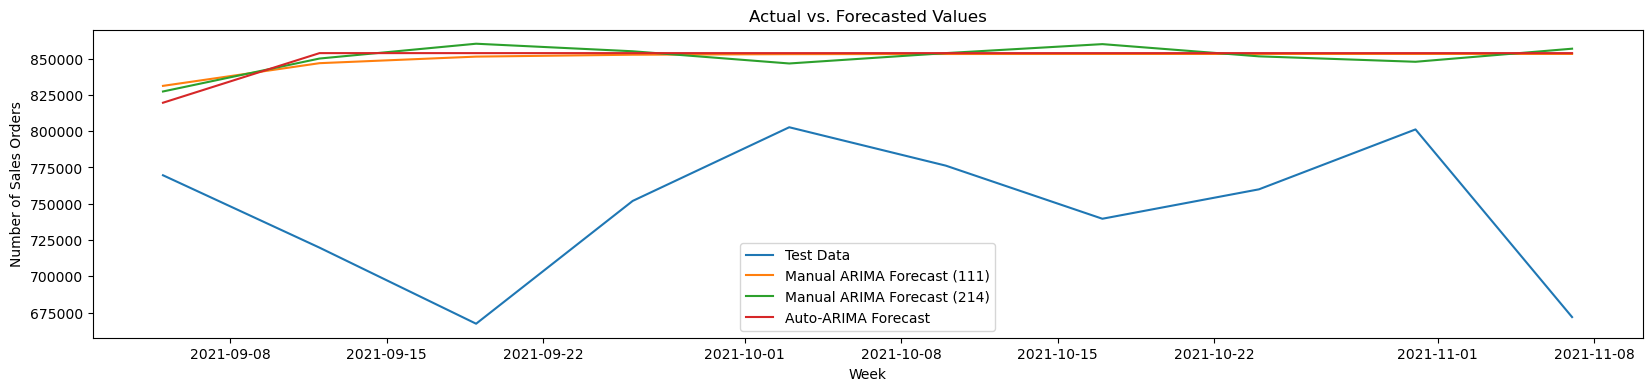

,Actual Value,Manual ARIMA forecast (111),Manual ARIMA forecast (214),Auto-ARIMA forecast
2021-09-05,"769,623","831,198","827,333","819,580"
2021-09-12,"719,740","846,834","850,031","853,765"
2021-09-19,"667,343","851,354","860,233","853,765"
2021-09-26,"751,935","852,660","855,033","853,765"
2021-10-03,"802,689","853,038","846,627","853,765"
2021-10-10,"776,240","853,147","853,765","853,765"
2021-10-17,"739,661","853,178","859,955","853,765"
2021-10-24,"759,926","853,187","851,537","853,765"
2021-10-31,"801,197","853,190","847,796","853,765"
2021-11-07,"671,926","853,191","856,805","853,765"


In [12]:
import matplotlib.pyplot as plt

# Make 10 forecast values using each of the models
steps = test.shape[0]
forecast_111 = model_111.forecast(steps=steps)
forecast_214 = model_214.forecast(steps=steps)
forecast_auto = model_auto.predict(n_periods=steps)

# Create a DataFrame to hold the actual and forecasted values
df_forecasts = pd.DataFrame({
    "Actual Value": test.values,
    "Manual ARIMA forecast (111)": forecast_111,
    "Manual ARIMA forecast (214)": forecast_214,
    "Auto-ARIMA forecast": forecast_auto
})

# Plot the actual values and forecasted values for each model
plt.figure(figsize=(20, 4))
#plt.plot(ts.index, ts.values, label='Training Data')
plt.plot(test.index, test.values, label='Test Data')
plt.plot(test.index, forecast_111, label='Manual ARIMA Forecast (111)')
plt.plot(test.index, forecast_214, label='Manual ARIMA Forecast (214)')
plt.plot(test.index, forecast_auto, label='Auto-ARIMA Forecast')
plt.title('Actual vs. Forecasted Values')
plt.xlabel('Week')
plt.ylabel('Number of Sales Orders')
plt.legend()
plt.show()

df_forecasts.astype(int).applymap('{:,}'.format)